In [14]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [28]:
path = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/"
file = "amcl_hybrid"
file_2 = "_num_markers"
file_3 = "_num_particles"
file_4 = "_weight_sensor"
file_5 = "_marker_error"
type_file =".txt"
full_path = str(path + file + type_file)
full_path_2 = str(path + file  + file_2 + type_file)
full_path_3 = str(path + file  + file_3 + type_file)
full_path_4 = str(path + file  + file_4 + type_file)
full_path_5 = str(path + file  + file_5 + type_file)
full_path_5

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/amcl_hybrid_marker_error.txt'

In [16]:
data = pandas.read_csv(full_path, skipinitialspace = True)
data.head()

,Time,X position error,Y position error,Position error,YALL error,X deviation,Y deviation,YALL deviation,Mean deviation
0,0.409,0.028115,0.011690,0.030449,-0.001470,0.463448,0.463314,0.192305,0.373023
1,7.410,0.006069,0.016163,0.017264,-0.002651,0.413832,0.429118,0.140631,0.327860
2,7.411,0.029864,0.019572,0.035706,-0.009749,0.362064,0.385558,0.132744,0.293456
3,8.908,0.050439,0.021830,0.054960,-0.005935,0.291211,0.340312,0.098553,0.243359
4,8.937,0.044408,0.008562,0.045226,-0.004823,0.261770,0.293559,0.083861,0.213063


In [17]:
data_2 = pandas.read_csv(full_path_2, skipinitialspace = True)
data_2.head()

,Time,Num Markers
0,0.109,1
1,0.202,1
2,0.300,1
3,0.398,1
4,0.500,1


In [18]:
data_3 = pandas.read_csv(full_path_3, skipinitialspace = True)
data_3.head()

,Time,Num Particles
0,0.076,2325
1,0.420,1767
2,7.411,904
3,7.418,731
4,8.909,501


In [19]:
data_4 = pandas.read_csv(full_path_4, skipinitialspace = True)
data_4.head()

,Time,Weight Laser,Weight Marker
0,0.000,0.000000,0.000000
1,0.407,0.000000,2.523279
2,7.409,0.000000,6.068293
3,7.410,1.684103,6.068293
4,8.908,1.684103,8.623264


In [29]:
data_5 = pandas.read_csv(full_path_5, skipinitialspace = True)
data_5.head()

,Time,Marker Error
0,0.000,0.000000
1,0.407,0.572892
2,7.409,0.430268
3,8.908,0.244682
4,10.330,0.102651


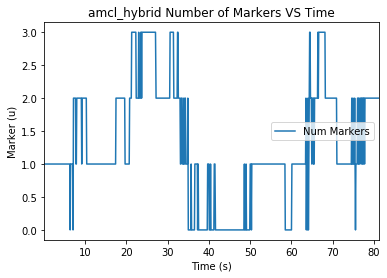

In [20]:
data_2.plot(kind = "line", x = "Time" ,y = {"Num Markers"})
plt.ylabel("Marker (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Markers VS Time")
plt.savefig( file + "_num_markers.png")

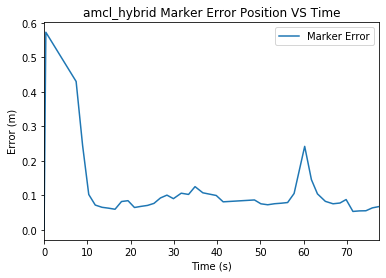

In [30]:
data_5.plot(kind = "line", x = "Time" ,y = {"Marker Error"})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Marker Error Position VS Time")
plt.savefig( file + "_marker_error_position.png")

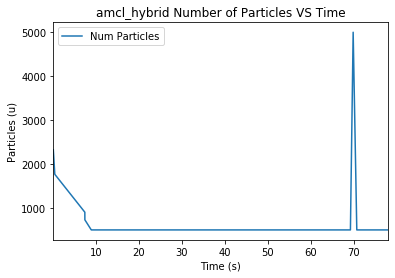

In [21]:
data_3.plot(kind = "line", x = "Time" ,y = {"Num Particles"})
plt.ylabel("Particles (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Particles VS Time")
plt.savefig( file + "_num_particles.png")

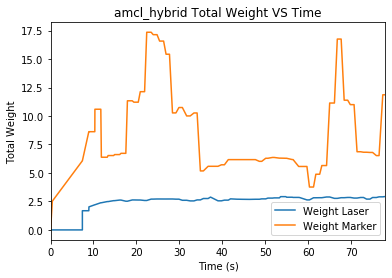

In [22]:
data_4.plot(kind = "line", x = "Time" ,y = {"Weight Laser", "Weight Marker"})
plt.ylabel("Total Weight")
plt.xlabel("Time (s)")
plt.title(file + " Total Weight VS Time")
plt.savefig( file + "_total_weight.png")

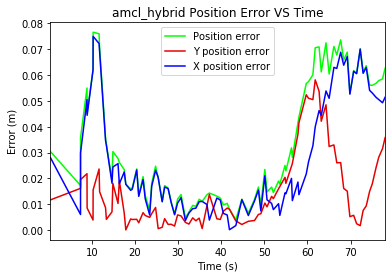

In [23]:
data.plot(kind = "line", x = "Time" ,y = {"X position error", "Y position error", "Position error"}, color = {(0.9,0.0,0.0), (0.0,1.0,0.0), (0.0,0.0,1.0)})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Position Error VS Time")
plt.savefig( file + "_position_error.png")

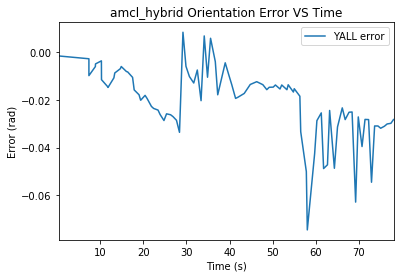

In [24]:
data.plot(kind = "line", x = "Time" ,y = {"YALL error"})
plt.ylabel("Error (rad)")
plt.xlabel("Time (s)")
plt.title(file + " Orientation Error VS Time")
plt.savefig(file + "_orientation_error.png")

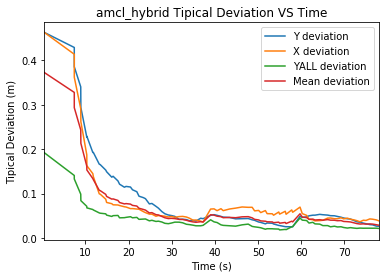

In [25]:
data.plot(kind = "line", x = "Time" ,y = {"X deviation", "Y deviation", "YALL deviation", "Mean deviation"})
plt.ylabel("Tipical Deviation (m)")
plt.xlabel("Time (s)")
plt.title(file + " Tipical Deviation VS Time")
plt.savefig(file + "_tipical_desviation.png")

In [26]:
mean_x_error = round(data["X position error"].mean(), 3)
mean_y_error = round(data["Y position error"].mean(), 3)
mean_pos_error = round(data["Position error"].mean(), 3)
mean_yall = round(data["YALL error"].abs().mean(), 3)
mean_x_covariance = round(data["X deviation"].mean(), 3)
mean_y_covariance = round(data["Y deviation"].mean(), 3)
mean_yall_covariance = round(data["YALL deviation"].mean(), 3)
mean_covariance = round(data["Mean deviation"].mean(), 3)
mean_weight_laser = round(data_4["Weight Laser"].mean(), 3)
mean_weight_marker = round(data_4["Weight Marker"].mean(), 3)
name_file = path + file + "_results.txt"
results = open(name_file, "w")
results.write("Mean laser weight: " + str(mean_weight_laser) + "\n")
results.write("Mean Marker weight: " + str(mean_weight_marker) + "\n")
results.write("Mean X position error: " + str(mean_x_error) + "\n")
results.write("Mean Y position error: " + str(mean_y_error) + "\n")
results.write("Mean Pos position error: " + str(mean_pos_error) + "\n")
results.write("Mean YALL error: " + str(mean_yall) + "\n")
results.write("Mean X deviation: " + str(mean_x_covariance) + "\n")
results.write("Mean Y deviation: " + str(mean_y_covariance) + "\n")
results.write("Mean YALL deviation: " + str(mean_yall_covariance) + "\n")
results.write("Mean deviation: " + str(mean_covariance) + "\n")
results.close()